In [1]:
import pandas as pd
import numpy as np
from time_series_transform.tensorflow_adopter import *
import time_series_transform.base as base
from time_series_transform.time_series_transformer import *
from sklearn.preprocessing import StandardScaler
from time_series_transform.tensorflow_adopter import *
from time_series_transform.stock_transform.base import *
from time_series_transform.stock_transform.stock_extractor import Portfolio_Extractor,Stock_Extractor
from time_series_transform.util import *
from matplotlib import pyplot as plt

In [3]:
tickList = [
    '2610.TW',
    '2618.TW'
]
pe = Portfolio_Extractor(tickList,'yahoo')
port = pe.get_portfolio_date('2000-06-24','2020-06-24')
# port.remove_different_date()

In [133]:
labels = []
colList = ['Open', 'High', 'Low', 'Close']
for c in colList:
    port.make_technical_indicator(c,f'{c}_ma5',moving_average,windowSize = 5)
    port.make_technical_indicator(c,f'{c}_ma10',moving_average,windowSize = 10)
    port.make_technical_indicator(c,f'{c}_ema10',ema,span = 10)
    port.make_technical_indicator(c,f'{c}_diff1',differencing,order = 1)
    
    for t in tickList:
        labels.extend([f'{t}_{c}',f'{t}_{c}_ma5',f'{t}_{c}_ma10',f'{t}_{c}_ema10',f'{t}_{c}_wavelet_1'])

In [134]:
df = port.get_portfolio_dataFrame()
df = df.dropna()

In [135]:
ptspd = Pandas_Time_Series_Panel_Dataset(df)

In [136]:
ptspd =ptspd.expand_dataFrame_by_category('Date','symbol')

In [137]:
ptspd = ptspd.make_slide_window('Date',60).make_lead_column('Date','Close_2610.TW',1)

In [138]:
df = ptspd.df

In [139]:
df = df.dropna()

In [140]:
train = df[df.Date <= '2020-03-01']
test = df[df.Date > '2020-03-01']
trainX = train.drop(['Date','Close_2610.TW_lead1'],axis = 1)
trainY = train["Close_2610.TW_lead1"]
testX = test.drop(['Date','Close_2610.TW_lead1'],axis = 1)
testY = test["Close_2610.TW_lead1"]

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.pipeline import Pipeline

In [147]:
rf = Pipeline([
#     ('std',StandardScaler()),
#     ('pca',PCA(50,whiten = False)),
    ('tree',RandomForestRegressor(100,n_jobs = -1))
#     ('svm',SVR(C = 0.5))
])

In [148]:
rf.fit(trainX,trainY)

Pipeline(memory=None,
         steps=[('tree',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [149]:
prd = rf.predict(testX)

In [150]:
from matplotlib import pyplot as plt

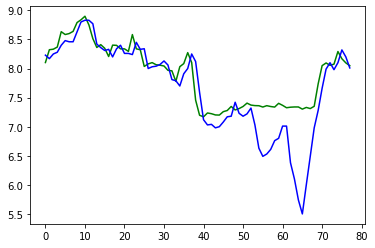

In [151]:
plt.plot(prd,color = 'green')
plt.plot(testY.values,color = 'blue')
plt.show()

In [161]:
fe = rf.named_steps['tree'].feature_importances_

In [168]:
fe = pd.DataFrame(fe,index = trainX.columns)

In [172]:
fe.sort_values(0)

,0
Stock Splits_2618.TW_lag25,0.000000
Stock Splits_2610.TW_lag12,0.000000
Dividends_2618.TW_lag24,0.000000
Dividends_2618.TW_lag25,0.000000
Stock Splits_2610.TW_lag11,0.000000
...,...
High_ema10_2610.TW,0.000192
Open_2610.TW,0.000406
Low_2610.TW,0.008513
High_2610.TW,0.020594


In [73]:
import pandas as pd
df = pd.DataFrame({'a':[1,2,3,1,1,1,2],'b':[12,22,32,12,12,12,22]})

In [74]:
from matplotlib import pyplot as plt
class b:
    def __init__(self,df):
        self.df = df
    
    def __call__(self,*args,**kwargs):
        self.printb(*args)
    
    def printc(cls,*args,**kwargs):
        cls.df.plot.barh()
    
    def printb (self,*args,**kwargs):
        self.df.plot()
        



class a (object):
    def __init__(self,df):
        self.a = df
    
    @property
    def b(self):
        return b(self.a)
        


In [75]:
abc = a(df)

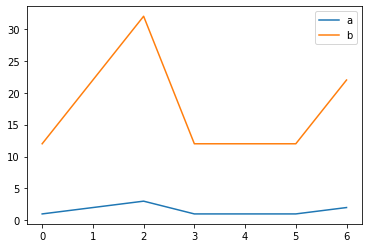

In [76]:
abc.b()

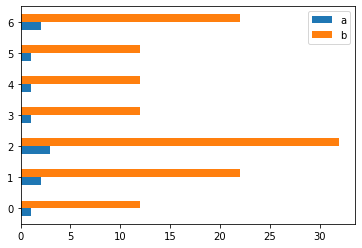

In [77]:
abc.b.printc()